#### 0929 복습

##### 1

In [1]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
arr1 = arr.copy()

In [13]:
np.concatenate([arr, arr1], axis = 0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
np.concatenate([arr, arr1], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [21]:
arr2 = pd.DataFrame(np.arange(12).reshape((3, 4)))
arr2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [22]:
arr3 = arr2.copy()

In [25]:
pd.concat([arr2, arr3], ignore_index = True)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,0,1,2,3
4,4,5,6,7
5,8,9,10,11


##### 2

In [26]:
df = pd.DataFrame({'key1': ['a', 'a', 'b',' b', 'a'],

                  'key2': ['one', 'two', 'one', 'two', 'one'],

                  'data1': np.random.randn(5),

                  'data2': np.random.randn(5)}) 

df

,key1,key2,data1,data2
0,a,one,-1.404644,-0.409313
1,a,two,0.652793,0.805290
2,b,one,-1.549480,-0.126925
3,b,two,0.934057,-1.216743
4,a,one,-0.627808,0.511648


In [28]:
df.groupby('key1').mean()[['data1']]

,data1
key1,
b,0.934057
a,-0.459886
b,-1.549480


In [30]:
df.groupby('key1').apply('mean')[['data1']]

,data1
key1,
b,0.934057
a,-0.459886
b,-1.549480


In [31]:
df.groupby('key1').agg('mean')[['data1']]

,data1
key1,
b,0.934057
a,-0.459886
b,-1.549480


##### 3

In [33]:
import pydataset

In [34]:
titanic = pydataset.data('titanic')
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [35]:
titanic.groupby(['class', 'sex']).agg('count')[['age']]

age
class     sex       
1st class man    180
          women  145
2nd class man    179
          women  106
3rd class man    510
          women  196

In [36]:
titanic.groupby(['class', 'sex']).apply('count')[['age']]

age
class     sex       
1st class man    180
          women  145
2nd class man    179
          women  106
3rd class man    510
          women  196

In [37]:
titanic.groupby(['class', 'sex']).count()[['age']]

age
class     sex       
1st class man    180
          women  145
2nd class man    179
          women  106
3rd class man    510
          women  196

##### 4

In [40]:
import seaborn as sns

In [48]:
df1 = titanic.groupby(['class', 'sex']).count()[['age']]

In [49]:
df1.reset_index()

,class,sex,age
0,1st class,man,180
1,1st class,women,145
2,2nd class,man,179
3,2nd class,women,106
4,3rd class,man,510
5,3rd class,women,196


In [50]:
df1 = df1.reset_index()

<AxesSubplot:xlabel='class', ylabel='age'>

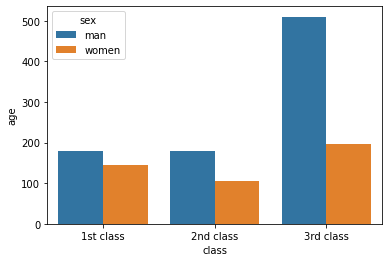

In [51]:
sns.barplot(data = df1, x = 'class', y = 'age', hue = 'sex')

##### 5

In [55]:
titanic.melt(id_vars = 'class', var_name = 'info')

,class,info,value
0,1st class,age,adults
1,1st class,age,adults
2,1st class,age,adults
3,1st class,age,adults
4,1st class,age,adults
...,...,...,...
3943,3rd class,survived,no
3944,3rd class,survived,no
3945,3rd class,survived,no
3946,3rd class,survived,no


##### 6

In [57]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [70]:
df = pd.crosstab(mpg['class'], mpg['manufacturer'])
df

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [67]:
df.reset_index()

manufacturer,class,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
0,2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
1,compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
2,midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
3,minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
4,pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
5,subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
6,suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [68]:
df1 = df.reset_index()

In [69]:
df1.melt(id_vars = 'class')

,class,manufacturer,value
0,2seater,audi,0
1,compact,audi,15
2,midsize,audi,3
3,minivan,audi,0
4,pickup,audi,0
5,subcompact,audi,0
6,suv,audi,0
7,2seater,chevrolet,5
8,compact,chevrolet,0
9,midsize,chevrolet,5


In [72]:
df.columns

Index(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'],
      dtype='object', name='manufacturer')

In [73]:
df.melt(value_vars = df.columns)

,manufacturer,value
0,audi,0
1,audi,15
2,audi,3
3,audi,0
4,audi,0
5,audi,0
6,audi,0
7,chevrolet,5
8,chevrolet,0
9,chevrolet,5


In [74]:
df.stack()

class       manufacturer
2seater     audi             0
            chevrolet        5
            dodge            0
            ford             0
            honda            0
            hyundai          0
            jeep             0
            land rover       0
            lincoln          0
            mercury          0
            nissan           0
            pontiac          0
            subaru           0
            toyota           0
            volkswagen       0
compact     audi            15
            chevrolet        0
            dodge            0
            ford             0
            honda            0
            hyundai          0
            jeep             0
            land rover       0
            lincoln          0
            mercury          0
            nissan           2
            pontiac          0
            subaru           4
            toyota          12
            volkswagen      14
midsize     audi             3
            ch

##### 8

In [76]:
df2 = df1.melt(id_vars = 'class')
df2[:3]

,class,manufacturer,value
0,2seater,audi,0
1,compact,audi,15
2,midsize,audi,3


In [79]:
bins = [0, 1, 10, 20]

In [83]:
pd.cut(df2['value'], bins, labels = ['none', 'few', 'many'])

0       NaN
1      many
2       few
3       NaN
4       NaN
5       NaN
6       NaN
7       few
8       NaN
9       few
10      NaN
11      NaN
12      NaN
13      few
14      NaN
15      NaN
16      NaN
17     many
18     many
19      NaN
20      few
21      NaN
22      NaN
23      NaN
24      NaN
25      few
26      few
27      few
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      few
34      NaN
35      NaN
36      NaN
37      few
38      NaN
39      NaN
40      few
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      few
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      few
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      few
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      few
70      NaN
71      few
72      few
73      NaN
74      NaN
75      NaN
76      few
77      NaN
78      NaN
79      few
80      NaN
81      NaN
82      NaN
83  

In [86]:
pd.cut(df2['value'], bins, right = False)    #'right = False' : 이상 ~ 미만

0        [0, 1)
1      [10, 20)
2       [1, 10)
3        [0, 1)
4        [0, 1)
5        [0, 1)
6        [0, 1)
7       [1, 10)
8        [0, 1)
9       [1, 10)
10       [0, 1)
11       [0, 1)
12       [0, 1)
13      [1, 10)
14       [0, 1)
15       [0, 1)
16       [0, 1)
17     [10, 20)
18     [10, 20)
19       [0, 1)
20      [1, 10)
21       [0, 1)
22       [0, 1)
23       [0, 1)
24       [0, 1)
25      [1, 10)
26      [1, 10)
27      [1, 10)
28       [0, 1)
29       [0, 1)
30       [0, 1)
31       [0, 1)
32       [0, 1)
33      [1, 10)
34       [0, 1)
35       [0, 1)
36       [0, 1)
37      [1, 10)
38       [0, 1)
39       [0, 1)
40      [1, 10)
41       [0, 1)
42       [0, 1)
43       [0, 1)
44       [0, 1)
45       [0, 1)
46       [0, 1)
47       [0, 1)
48      [1, 10)
49       [0, 1)
50       [0, 1)
51       [0, 1)
52       [0, 1)
53       [0, 1)
54       [0, 1)
55      [1, 10)
56       [0, 1)
57       [0, 1)
58       [0, 1)
59       [0, 1)
60       [0, 1)
61       [0, 1)
62      

In [87]:
pd.cut(df2['value'], bins, labels = ['none', 'few', 'many'], right = False)

0      none
1      many
2       few
3      none
4      none
5      none
6      none
7       few
8      none
9       few
10     none
11     none
12     none
13      few
14     none
15     none
16     none
17     many
18     many
19     none
20      few
21     none
22     none
23     none
24     none
25      few
26      few
27      few
28     none
29     none
30     none
31     none
32     none
33      few
34     none
35     none
36     none
37      few
38     none
39     none
40      few
41     none
42     none
43     none
44     none
45     none
46     none
47     none
48      few
49     none
50     none
51     none
52     none
53     none
54     none
55      few
56     none
57     none
58     none
59     none
60     none
61     none
62      few
63     none
64     none
65     none
66     none
67     none
68     none
69      few
70     none
71      few
72      few
73     none
74     none
75     none
76      few
77     none
78     none
79      few
80     none
81     none
82     none
83  

In [82]:
df2['frequency'] = pd.cut(df2['value'], bins, labels = ['none', 'few', 'many'])
df2

,class,manufacturer,value,frequency
0,2seater,audi,0,NaN
1,compact,audi,15,many
2,midsize,audi,3,few
3,minivan,audi,0,NaN
4,pickup,audi,0,NaN
5,subcompact,audi,0,NaN
6,suv,audi,0,NaN
7,2seater,chevrolet,5,few
8,compact,chevrolet,0,NaN
9,midsize,chevrolet,5,few


##### 9

In [89]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [98]:
mpg.groupby(['manufacturer', 'year']).agg(['max', 'mean'])

C:\Users\admin\AppData\Local\Temp\ipykernel_8132\1351794740.py:1: FutureWarning: ['model', 'trans', 'drv', 'fl', 'class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mpg.groupby(['manufacturer', 'year']).agg(['max', 'mean'])


displ           cyl           cty            hwy           
                    max      mean max      mean max       mean max       mean
manufacturer year                                                            
audi         1999   2.8  2.355556   6  5.111111  21  17.111111  29  26.111111
             2008   4.2  2.733333   8  5.333333  21  18.111111  31  26.777778
chevrolet    1999   6.5  4.971429   8  7.142857  19  15.142857  27  21.571429
             2008   7.0  5.116667   8  7.333333  22  14.916667  30  22.083333
dodge        1999   5.9  4.318750   8  6.750000  18  13.375000  24  18.437500
             2008   5.7  4.423810   8  7.333333  17  12.952381  24  17.571429
ford         1999   5.4  4.453333   8  7.066667  18  13.933333  26  18.600000
             2008   5.4  4.660000   8  7.400000  17  14.100000  26  20.500000
honda        1999   1.6  1.600000   4  4.000000  28  24.800000  33  31.600000
             2008   2.0  1.850000   4  4.000000  26  24.000000  36  33.750000
hyundai      1999   2.5  2.300000   6  4.666667  19  18.333333  29  26.666667
             2008   3.3  2.525000   6  5.000000  21  18.875000  31  27.000000
jeep         1999   4.7  4.350000   8  7.000000  15  14.500000  20  18.500000
             2008   6.1  4.650000   8  7.333333  17  13.166667  22  17.333333
land rover   1999   4.6  4.300000   8  8.000000  11  11.000000  15  15.000000
             2008   4.4  4.300000   8  8.000000  12  12.000000  18  18.000000
lincoln      1999   5.4  5.400000   8  8.000000  11  11.000000  17  16.500000
             2008   5.4  5.400000   8  8.000000  12  12.000000  18  18.000000
mercury      1999   5.0  4.500000   8  7.000000  14  13.500000  17  17.000000
             2008   4.6  4.300000   8  7.000000  13  13.000000  19  19.000000
nissan       1999   3.3  2.900000   6  5.333333  21  17.666667  29  23.500000
             2008   5.6  3.585714   8  5.714286  23  18.428571  32  25.571429
pontiac      1999   3.8  3.566667   6  6.000000  18  17.000000  27  26.333333
             2008   5.3  4.550000   8  7.000000  18  17.000000  28  26.500000
subaru       1999   2.5  2.400000   4  4.000000  21  19.000000  26  25.500000
             2008   2.5  2.500000   4  4.000000  20  19.500000  27  25.625000
toyota       1999   4.7  2.765000   8  5.000000  26  18.150000  35  24.050000
             2008   5.7  3.221429   8  5.285714  28  19.071429  37  26.142857
volkswagen   1999   2.8  2.206250   6  4.625000  35  21.250000  44  29.687500
             2008   3.6  2.327273   6  4.545455  22  20.454545  29  28.545455

In [91]:
mpg.groupby(['year', 'manufacturer']).agg(['max', 'mean'])

C:\Users\admin\AppData\Local\Temp\ipykernel_8132\2679287730.py:1: FutureWarning: ['model', 'trans', 'drv', 'fl', 'class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mpg.groupby(['year', 'manufacturer']).agg(['max', 'mean'])


displ           cyl           cty            hwy           
                    max      mean max      mean max       mean max       mean
year manufacturer                                                            
1999 audi           2.8  2.355556   6  5.111111  21  17.111111  29  26.111111
     chevrolet      6.5  4.971429   8  7.142857  19  15.142857  27  21.571429
     dodge          5.9  4.318750   8  6.750000  18  13.375000  24  18.437500
     ford           5.4  4.453333   8  7.066667  18  13.933333  26  18.600000
     honda          1.6  1.600000   4  4.000000  28  24.800000  33  31.600000
     hyundai        2.5  2.300000   6  4.666667  19  18.333333  29  26.666667
     jeep           4.7  4.350000   8  7.000000  15  14.500000  20  18.500000
     land rover     4.6  4.300000   8  8.000000  11  11.000000  15  15.000000
     lincoln        5.4  5.400000   8  8.000000  11  11.000000  17  16.500000
     mercury        5.0  4.500000   8  7.000000  14  13.500000  17  17.000000
     nissan         3.3  2.900000   6  5.333333  21  17.666667  29  23.500000
     pontiac        3.8  3.566667   6  6.000000  18  17.000000  27  26.333333
     subaru         2.5  2.400000   4  4.000000  21  19.000000  26  25.500000
     toyota         4.7  2.765000   8  5.000000  26  18.150000  35  24.050000
     volkswagen     2.8  2.206250   6  4.625000  35  21.250000  44  29.687500
2008 audi           4.2  2.733333   8  5.333333  21  18.111111  31  26.777778
     chevrolet      7.0  5.116667   8  7.333333  22  14.916667  30  22.083333
     dodge          5.7  4.423810   8  7.333333  17  12.952381  24  17.571429
     ford           5.4  4.660000   8  7.400000  17  14.100000  26  20.500000
     honda          2.0  1.850000   4  4.000000  26  24.000000  36  33.750000
     hyundai        3.3  2.525000   6  5.000000  21  18.875000  31  27.000000
     jeep           6.1  4.650000   8  7.333333  17  13.166667  22  17.333333
     land rover     4.4  4.300000   8  8.000000  12  12.000000  18  18.000000
     lincoln        5.4  5.400000   8  8.000000  12  12.000000  18  18.000000
     mercury        4.6  4.300000   8  7.000000  13  13.000000  19  19.000000
     nissan         5.6  3.585714   8  5.714286  23  18.428571  32  25.571429
     pontiac        5.3  4.550000   8  7.000000  18  17.000000  28  26.500000
     subaru         2.5  2.500000   4  4.000000  20  19.500000  27  25.625000
     toyota         5.7  3.221429   8  5.285714  28  19.071429  37  26.142857
     volkswagen     3.6  2.327273   6  4.545455  22  20.454545  29  28.545455

In [92]:
mpg.groupby(['year', 'manufacturer']).agg({'displ' : 'max', 'cyl' : 'sum'})

displ  cyl
year manufacturer            
1999 audi            2.8   46
     chevrolet       6.5   50
     dodge           5.9  108
     ford            5.4  106
     honda           1.6   20
     hyundai         2.5   28
     jeep            4.7   14
     land rover      4.6   16
     lincoln         5.4   16
     mercury         5.0   14
     nissan          3.3   32
     pontiac         3.8   18
     subaru          2.5   24
     toyota          4.7  100
     volkswagen      2.8   74
2008 audi            4.2   48
     chevrolet       7.0   88
     dodge           5.7  154
     ford            5.4   74
     honda           2.0   16
     hyundai         3.3   40
     jeep            6.1   44
     land rover      4.4   16
     lincoln         5.4    8
     mercury         4.6   14
     nissan          5.6   40
     pontiac         5.3   14
     subaru          2.5   32
     toyota          5.7   74
     volkswagen      3.6   50

In [97]:
mpg.groupby(['year', 'manufacturer']).agg(displ_max = ('displ', 'max'),
                                          cyl_sum = ('cyl', 'sum'))

displ_max  cyl_sum
year manufacturer                    
1999 audi                2.8       46
     chevrolet           6.5       50
     dodge               5.9      108
     ford                5.4      106
     honda               1.6       20
     hyundai             2.5       28
     jeep                4.7       14
     land rover          4.6       16
     lincoln             5.4       16
     mercury             5.0       14
     nissan              3.3       32
     pontiac             3.8       18
     subaru              2.5       24
     toyota              4.7      100
     volkswagen          2.8       74
2008 audi                4.2       48
     chevrolet           7.0       88
     dodge               5.7      154
     ford                5.4       74
     honda               2.0       16
     hyundai             3.3       40
     jeep                6.1       44
     land rover          4.4       16
     lincoln             5.4        8
     mercury             4.6       14
     nissan              5.6       40
     pontiac             5.3       14
     subaru              2.5       32
     toyota              5.7       74
     volkswagen          3.6       50

In [101]:
mpg.groupby(['year', 'manufacturer'])[['displ']].quantile(0.85)

displ
year manufacturer       
1999 audi          2.800
     chevrolet     5.780
     dodge         5.200
     ford          4.960
     honda         1.600
     hyundai       2.500
     jeep          4.595
     land rover    4.510
     lincoln       5.400
     mercury       4.850
     nissan        3.300
     pontiac       3.800
     subaru        2.500
     toyota        3.400
     volkswagen    2.800
2008 audi          3.100
     chevrolet     6.200
     dodge         4.700
     ford          5.400
     honda         1.910
     hyundai       2.700
     jeep          5.800
     land rover    4.370
     lincoln       5.400
     mercury       4.510
     nissan        4.160
     pontiac       5.075
     subaru        2.500
     toyota        4.035
     volkswagen    2.500

### 0930

#### (4) 피벗테이블과 교차일람표

#### 피벗테이블 pivot_table

In [102]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [108]:
tips.groupby(['day','smoker']).agg('mean')

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [109]:
tips.pivot_table(values = 'tip_pct', index = 'time', columns = 'smoker')

smoker,No,Yes
time,,
Dinner,0.158653,0.160828
Lunch,0.160920,0.170404


In [110]:
tips.pivot_table(values = ['size','tip_pct'], index = 'time', columns = 'smoker')

size             tip_pct          
smoker        No       Yes        No       Yes
time                                          
Dinner  2.735849  2.471429  0.158653  0.160828
Lunch   2.511111  2.217391  0.160920  0.170404

In [111]:
tips.pivot_table(values = ['size','tip_pct'], index = ['time','day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [113]:
tips.pivot_table(values = 'tip_pct', index = 'time', columns = 'smoker')

smoker,No,Yes
time,,
Dinner,0.158653,0.160828
Lunch,0.160920,0.170404


In [115]:
#pivot_table 은 'margin(마진)' 이라고 하는 부분합(중간값)을 추가할 수 있다
tips.pivot_table(values = 'tip_pct', index = 'time', columns = 'smoker', margins = True)

smoker,No,Yes,All
time,,,
Dinner,0.158653,0.160828,0.159518
Lunch,0.160920,0.170404,0.164128
All,0.159328,0.163196,0.160803


In [116]:
tips.pivot_table(values = 'tip_pct', index = ['time','day'], columns = 'smoker', margins = True)

smoker             No       Yes       All
time   day                               
Dinner Fri   0.139622  0.165347  0.158916
       Sat   0.158048  0.147906  0.153152
       Sun   0.160113  0.187250  0.166897
       Thur  0.159744       NaN  0.159744
Lunch  Fri   0.187735  0.188937  0.188765
       Thur  0.160311  0.163863  0.161301
All          0.159328  0.163196  0.160803

In [117]:
tips.pivot_table(values = 'tip_pct', index = ['time','day'],
                 columns = 'smoker', margins = True, aggfunc=len)

smoker          No   Yes  All
time   day                   
Dinner Fri     3.0   9.0   12
       Sat    45.0  42.0   87
       Sun    57.0  19.0   76
       Thur    1.0   NaN    1
Lunch  Fri     1.0   6.0    7
       Thur   44.0  17.0   61
All          151.0  93.0  244

In [119]:
tips.pivot_table(values = 'tip_pct', index = ['time','day'],
                 columns = 'smoker', margins = True, aggfunc=sum)

smoker              No        Yes        All
time   day                                  
Dinner Fri    0.418867   1.488126   1.906993
       Sat    7.112145   6.212055  13.324199
       Sun    9.126438   3.557756  12.684194
       Thur   0.159744        NaN   0.159744
Lunch  Fri    0.187735   1.133620   1.321354
       Thur   7.053669   2.785676   9.839345
All          24.058598  15.177232  39.235830

#### * 교차일람표 crosstab

In [120]:
pd.crosstab(index = tips.time, columns = tips.smoker)

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


In [121]:
pd.crosstab(index = [tips.time, tips.day], columns = tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

#### 10. 시계열

#### (1) 날짜, 시간 자료형, 도구 datetime

In [122]:
from datetime import datetime

In [123]:
now = datetime.now()
now

datetime.datetime(2022, 9, 30, 11, 12, 30, 448865)

In [127]:
now.year, now.month, now.day

(2022, 9, 30)

In [128]:
now.second, now.microsecond

(30, 448865)

In [129]:
new_year = datetime(2023,1,1)
new_year - now

datetime.timedelta(days=92, seconds=46049, microseconds=551135)

In [134]:
delta = new_year - now
delta.days

92

In [136]:
new_year - delta

datetime.datetime(2022, 9, 30, 11, 12, 30, 448865)

#### * 문자열을 datetime 객체로 변환하기<br>
strftime : datetime을 문자열로<br>
strptime : 문자열을 datetime 으로

In [139]:
print(now.strftime('%Y - %m - %d'))
now.strftime('%S - %M - %H')

2022 - 09 - 30


'30 - 12 - 11'

In [142]:
value = now.strftime('%Y - %m - %d - %H - %M - %S')
value    #str 형태이다

'2022 - 09 - 30 - 11 - 12 - 30'

In [148]:
#strptime - 방법1 : 띄어쓰기까지 정확하게 맞추어야한다
datetime.strptime(value, '%Y - %m-%d')

ValueError: time data '2022 - 09 - 30 - 11 - 12 - 30' does not match format '%Y - %m-%d'

In [149]:
datetime.strptime(value, '%Y - %m - %d - %H - %M - %S')

datetime.datetime(2022, 9, 30, 11, 12, 30)

In [159]:
#strptime - 방법2 : parse()
from dateutil.parser import parse

In [160]:
value = now.strftime('%Y-%m-%d-%H-%M-%S')
value

'2022-09-30-11-12-30'

In [161]:
parse(value)

datetime.datetime(2022, 9, 30, 11, 0, tzinfo=tzoffset(None, -108000))

In [162]:
value = now.strftime('%Y/%m/%d/%H/%M/%S')
value

'2022/09/30/11/12/30'

In [163]:
parse(value)

ParserError: Unknown string format: 2022/09/30/11/12/30

In [164]:
#strptime - 방법3 : to_datetime
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [165]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

#### (2) 시계열 기초 : Time Series 만들기

In [168]:
pd.date_range(start = '1/1/2000', periods = 10)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [170]:
pd.date_range(start = '1/1/2000', end = '2/2/2000')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02'],
              dtype='datetime64[ns]', freq='D')

In [171]:
pd.date_range(start = '1/1/2000', end = '2/2/2000', freq = '5H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00', '2000-01-02 01:00:00',
               '2000-01-02 06:00:00', '2000-01-02 11:00:00',
               '2000-01-02 16:00:00', '2000-01-02 21:00:00',
               ...
               '2000-01-31 00:00:00', '2000-01-31 05:00:00',
               '2000-01-31 10:00:00', '2000-01-31 15:00:00',
               '2000-01-31 20:00:00', '2000-02-01 01:00:00',
               '2000-02-01 06:00:00', '2000-02-01 11:00:00',
               '2000-02-01 16:00:00', '2000-02-01 21:00:00'],
              dtype='datetime64[ns]', length=154, freq='5H')

In [177]:
dates = pd.date_range(start = '1/2/2011', end = '1/12/2011', freq = '2D')
dates

DatetimeIndex(['2011-01-02', '2011-01-04', '2011-01-06', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq='2D')

In [178]:
ts = pd.Series(np.random.randint(6), index = dates)
ts

2011-01-02    2
2011-01-04    2
2011-01-06    2
2011-01-08    2
2011-01-10    2
2011-01-12    2
Freq: 2D, dtype: int64

In [179]:
#dates를 index로 했기 때문에 인덱싱, 슬라이싱이 가능하다
ts[2]

2

In [180]:
ts[::2]

2011-01-02    2
2011-01-06    2
2011-01-10    2
Freq: 4D, dtype: int64

In [181]:
#연산이 가능하다
ts + ts[::2]

2011-01-02    4.0
2011-01-04    NaN
2011-01-06    4.0
2011-01-08    NaN
2011-01-10    4.0
2011-01-12    NaN
dtype: float64

#### * 색인, 선택, 부분 선택

In [182]:
longer_ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
longer_ts

2000-01-01   -0.169526
2000-01-02   -1.490933
2000-01-03    0.197684
2000-01-04   -0.956374
2000-01-05    1.380068
                ...   
2002-09-22    0.502188
2002-09-23   -1.267640
2002-09-24   -0.541845
2002-09-25    1.046347
2002-09-26    2.205182
Freq: D, Length: 1000, dtype: float64

In [184]:
longer_ts['2001']
longer_ts['2001-01']

2001-01-01    1.092331
2001-01-02    1.728667
2001-01-03   -0.731611
2001-01-04    0.272719
2001-01-05    1.021158
2001-01-06    0.682110
2001-01-07    0.127493
2001-01-08    1.362932
2001-01-09    0.195997
2001-01-10   -1.054265
2001-01-11   -1.467686
2001-01-12    1.204963
2001-01-13   -0.702785
2001-01-14   -1.781752
2001-01-15    0.179672
2001-01-16   -1.349279
2001-01-17   -0.753885
2001-01-18   -0.405394
2001-01-19   -0.325596
2001-01-20   -0.447521
2001-01-21    0.839987
2001-01-22   -0.734624
2001-01-23    0.063796
2001-01-24   -0.248011
2001-01-25    0.563795
2001-01-26   -0.969340
2001-01-27   -0.987543
2001-01-28   -0.548881
2001-01-29   -0.820073
2001-01-30    0.013472
2001-01-31    1.018114
Freq: D, dtype: float64

In [188]:
longer_ts['2002-09': ]

2002-09-01    1.549475
2002-09-02    0.534228
2002-09-03   -0.145617
2002-09-04    1.676564
2002-09-05    0.717120
2002-09-06    1.450075
2002-09-07    0.472046
2002-09-08   -1.092830
2002-09-09   -1.949918
2002-09-10   -1.157891
2002-09-11   -0.752711
2002-09-12   -1.549590
2002-09-13    1.195071
2002-09-14    0.557322
2002-09-15   -1.978969
2002-09-16   -0.716790
2002-09-17   -0.111316
2002-09-18   -0.106884
2002-09-19    1.351142
2002-09-20    1.510892
2002-09-21    1.586640
2002-09-22    0.502188
2002-09-23   -1.267640
2002-09-24   -0.541845
2002-09-25    1.046347
2002-09-26    2.205182
Freq: D, dtype: float64

In [190]:
longer_ts['2002/09/15': ]     #'-' 대신 '/' 를 써도 검색이 된다

2002-09-15   -1.978969
2002-09-16   -0.716790
2002-09-17   -0.111316
2002-09-18   -0.106884
2002-09-19    1.351142
2002-09-20    1.510892
2002-09-21    1.586640
2002-09-22    0.502188
2002-09-23   -1.267640
2002-09-24   -0.541845
2002-09-25    1.046347
2002-09-26    2.205182
Freq: D, dtype: float64

In [193]:
longer_ts.truncate(before = '2002/03')

2002-03-01   -0.435402
2002-03-02    0.701993
2002-03-03    0.341340
2002-03-04   -1.376487
2002-03-05   -0.683720
                ...   
2002-09-22    0.502188
2002-09-23   -1.267640
2002-09-24   -0.541845
2002-09-25    1.046347
2002-09-26    2.205182
Freq: D, Length: 210, dtype: float64

In [195]:
longer_ts.truncate(before = '2002/08/15', after = '2002/09/25')

2002-08-15    1.239890
2002-08-16    1.059207
2002-08-17   -0.628347
2002-08-18    0.274549
2002-08-19    0.678610
2002-08-20    0.009679
2002-08-21    0.157606
2002-08-22   -0.340513
2002-08-23    0.701085
2002-08-24    0.177691
2002-08-25    0.179190
2002-08-26    0.115952
2002-08-27   -1.340812
2002-08-28    0.056279
2002-08-29    1.310193
2002-08-30    1.546954
2002-08-31    2.903602
2002-09-01    1.549475
2002-09-02    0.534228
2002-09-03   -0.145617
2002-09-04    1.676564
2002-09-05    0.717120
2002-09-06    1.450075
2002-09-07    0.472046
2002-09-08   -1.092830
2002-09-09   -1.949918
2002-09-10   -1.157891
2002-09-11   -0.752711
2002-09-12   -1.549590
2002-09-13    1.195071
2002-09-14    0.557322
2002-09-15   -1.978969
2002-09-16   -0.716790
2002-09-17   -0.111316
2002-09-18   -0.106884
2002-09-19    1.351142
2002-09-20    1.510892
2002-09-21    1.586640
2002-09-22    0.502188
2002-09-23   -1.267640
2002-09-24   -0.541845
2002-09-25    1.046347
Freq: D, dtype: float64

In [196]:
df = pd.DataFrame(longer_ts)
df

,0
2000-01-01,-0.169526
2000-01-02,-1.490933
2000-01-03,0.197684
2000-01-04,-0.956374
2000-01-05,1.380068
...,...
2002-09-22,0.502188
2002-09-23,-1.267640
2002-09-24,-0.541845
2002-09-25,1.046347


In [198]:
df[:3]

,0
2000-01-01,-0.169526
2000-01-02,-1.490933
2000-01-03,0.197684


In [199]:
df['2002-09']

C:\Users\admin\AppData\Local\Temp\ipykernel_8132\132272024.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2002-09']


,0
2002-09-01,1.549475
2002-09-02,0.534228
2002-09-03,-0.145617
2002-09-04,1.676564
2002-09-05,0.717120
2002-09-06,1.450075
2002-09-07,0.472046
2002-09-08,-1.092830
2002-09-09,-1.949918
2002-09-10,-1.157891


In [202]:
df.loc['2002-09']

,0
2002-09-01,1.549475
2002-09-02,0.534228
2002-09-03,-0.145617
2002-09-04,1.676564
2002-09-05,0.717120
2002-09-06,1.450075
2002-09-07,0.472046
2002-09-08,-1.092830
2002-09-09,-1.949918
2002-09-10,-1.157891


#### * 중복된 색인을 갖는 시계열

In [253]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [254]:
ts = pd.Series(np.arange(5), index = dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [255]:
ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [256]:
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [257]:
ts.groupby(level = 0).mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [258]:
df = pd.DataFrame(ts)
df.reset_index()

,index,0
0,2000-01-01,0
1,2000-01-02,1
2,2000-01-02,2
3,2000-01-02,3
4,2000-01-03,4


In [259]:
df = df.reset_index()

In [260]:
df.groupby('index').mean()

,0
index,
2000-01-01,0.0
2000-01-02,2.0
2000-01-03,4.0


#### (3) 날짜 범위, 빈도, 이동

In [261]:
list(ts.resample('D'))

[(Timestamp('2000-01-01 00:00:00', freq='D'),
  2000-01-01    0
  dtype: int32),
 (Timestamp('2000-01-02 00:00:00', freq='D'),
  2000-01-02    1
  2000-01-02    2
  2000-01-02    3
  dtype: int32),
 (Timestamp('2000-01-03 00:00:00', freq='D'),
  2000-01-03    4
  dtype: int32)]

#### * 데이터 시프트 shift

In [262]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M')) 

In [263]:
ts

2000-01-31    0.342985
2000-02-29    0.306984
2000-03-31    2.276777
2000-04-30   -0.520908
Freq: M, dtype: float64

In [264]:
ts.shift(1)    #데이터가 한칸씩 내려감

2000-01-31         NaN
2000-02-29    0.342985
2000-03-31    0.306984
2000-04-30    2.276777
Freq: M, dtype: float64

In [265]:
ts.shift(-1)    #데이터가 한칸씩 올라감

2000-01-31    0.306984
2000-02-29    2.276777
2000-03-31   -0.520908
2000-04-30         NaN
Freq: M, dtype: float64

In [266]:
ts / ts.shift(1)     #어제 값에 대한 오늘의 비율

2000-01-31         NaN
2000-02-29    0.895037
2000-03-31    7.416594
2000-04-30   -0.228792
Freq: M, dtype: float64

In [267]:
ts / ts.shift(1) - 1    #하루 전에 대한 증가율

2000-01-31         NaN
2000-02-29   -0.104963
2000-03-31    6.416594
2000-04-30   -1.228792
Freq: M, dtype: float64

In [268]:
ts / ts.shift(2) - 1    #이틀 전에 대한 증가율

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    5.638128
2000-04-30   -2.696857
Freq: M, dtype: float64

In [269]:
ts = pd.date_range('3/9/2012 9:30', periods = 10)
ts

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-17 09:30:00', '2012-03-18 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [270]:
ts.tz_localize('UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [271]:
ts = ts.tz_localize('UTC')
ts.tz_convert("America/New_York")

DatetimeIndex(['2012-03-09 04:30:00-05:00', '2012-03-10 04:30:00-05:00',
               '2012-03-11 05:30:00-04:00', '2012-03-12 05:30:00-04:00',
               '2012-03-13 05:30:00-04:00', '2012-03-14 05:30:00-04:00',
               '2012-03-15 05:30:00-04:00', '2012-03-16 05:30:00-04:00',
               '2012-03-17 05:30:00-04:00', '2012-03-18 05:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

#### (6) 리샘플링과 빈도 변환

In [273]:
ts = pd.Series(np.random.randn(100),
               index = pd.date_range('2000-01-01', periods = 100, freq = 'D'))
ts

2000-01-01   -1.102725
2000-01-02    1.082584
2000-01-03    1.735910
2000-01-04    0.331300
2000-01-05    0.954473
2000-01-06    1.323862
2000-01-07    0.364902
2000-01-08    1.436283
2000-01-09   -0.223951
2000-01-10   -1.049816
2000-01-11    0.103135
2000-01-12   -1.508331
2000-01-13    0.006569
2000-01-14    0.547472
2000-01-15    0.747237
2000-01-16    0.705943
2000-01-17   -0.018772
2000-01-18    0.759559
2000-01-19    0.492271
2000-01-20    1.027563
2000-01-21    0.263368
2000-01-22   -0.860911
2000-01-23   -0.343209
2000-01-24   -1.450988
2000-01-25    1.624946
2000-01-26    0.610097
2000-01-27    0.947881
2000-01-28    0.619948
2000-01-29   -0.229922
2000-01-30    0.623577
2000-01-31   -1.146878
2000-02-01    0.997210
2000-02-02    0.050267
2000-02-03    0.758576
2000-02-04   -0.610318
2000-02-05    0.608536
2000-02-06    0.126541
2000-02-07   -0.553864
2000-02-08   -0.221096
2000-02-09   -1.131311
2000-02-10    0.508866
2000-02-11   -1.296849
2000-02-12   -0.482616
2000-02-13 

In [274]:
ts.resample('W').mean()    #'W' : '주' 별로

2000-01-02   -0.010071
2000-01-09    0.846111
2000-01-16   -0.063970
2000-01-23    0.188553
2000-01-30    0.392220
2000-02-06    0.111991
2000-02-13   -0.790359
2000-02-20   -0.101228
2000-02-27   -0.415171
2000-03-05   -0.022264
2000-03-12   -0.471339
2000-03-19   -0.136220
2000-03-26   -0.197421
2000-04-02   -0.252598
2000-04-09   -0.201011
Freq: W-SUN, dtype: float64

In [276]:
ts.resample('M').mean()    #'M' : '월' 별로

2000-01-31    0.270109
2000-02-29   -0.190931
2000-03-31   -0.286887
2000-04-30   -0.194664
Freq: M, dtype: float64

In [277]:
ts.resample('M', kind = 'period').mean()

2000-01    0.270109
2000-02   -0.190931
2000-03   -0.286887
2000-04   -0.194664
Freq: M, dtype: float64

#### * 다운샘플링

In [280]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [281]:
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [283]:
ts.resample('5min')
list(ts.resample('5min'))

[(Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01 00:00:00    0
  2000-01-01 00:01:00    1
  2000-01-01 00:02:00    2
  2000-01-01 00:03:00    3
  2000-01-01 00:04:00    4
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:05:00    5
  2000-01-01 00:06:00    6
  2000-01-01 00:07:00    7
  2000-01-01 00:08:00    8
  2000-01-01 00:09:00    9
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:10:00    10
  2000-01-01 00:11:00    11
  Freq: T, dtype: int32)]

In [284]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [286]:
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

* OHLC 샘플링

In [288]:
list(ts.resample('5min'))

[(Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01 00:00:00    0
  2000-01-01 00:01:00    1
  2000-01-01 00:02:00    2
  2000-01-01 00:03:00    3
  2000-01-01 00:04:00    4
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:05:00    5
  2000-01-01 00:06:00    6
  2000-01-01 00:07:00    7
  2000-01-01 00:08:00    8
  2000-01-01 00:09:00    9
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:10:00    10
  2000-01-01 00:11:00    11
  Freq: T, dtype: int32)]

In [321]:
list(ts.resample('5min', closed = 'right'))

[(Timestamp('1999-12-31 23:55:00', freq='5T'),
  2000-01-01    0
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:00:00', freq='5T'),
  2000-01-01 00:01:00    1
  2000-01-01 00:02:00    2
  2000-01-01 00:03:00    3
  2000-01-01 00:04:00    4
  2000-01-01 00:05:00    5
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:05:00', freq='5T'),
  2000-01-01 00:06:00     6
  2000-01-01 00:07:00     7
  2000-01-01 00:08:00     8
  2000-01-01 00:09:00     9
  2000-01-01 00:10:00    10
  Freq: T, dtype: int32),
 (Timestamp('2000-01-01 00:10:00', freq='5T'),
  2000-01-01 00:11:00    11
  Freq: T, dtype: int32)]

In [287]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11 Pandas

#### (1) Categorical 데이터

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [289]:
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [290]:
values.unique()

array(['apple', 'orange'], dtype=object)

In [291]:
values.value_counts()

apple     6
orange    2
dtype: int64

In [293]:
values = values.astype('category')
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: category
Categories (2, object): ['apple', 'orange']

In [294]:
values = pd.Series([0,1,0,0]*2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [295]:
dim = pd.Series(['apple', 'orange'])
dim

0     apple
1    orange
dtype: object

In [296]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

#### (2) Pandas 의 Categorical

In [297]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)

In [302]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,13,0.162851
1,1,orange,3,0.889270
2,2,apple,9,3.364014
3,3,apple,4,2.563116
4,4,apple,13,0.314844
5,5,orange,7,1.435080
6,6,apple,4,1.666647
7,7,apple,12,1.577706


In [303]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)})
df

,fruit,basket_id,count,weight
0,apple,0,3,0.733864
1,orange,1,12,1.239964
2,apple,2,12,0.724106
3,apple,3,4,3.758374
4,apple,4,7,0.345547
5,orange,5,4,3.484889
6,apple,6,3,2.854055
7,apple,7,9,3.823842


In [306]:
df['fruit'] = df['fruit'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fruit      8 non-null      category
 1   basket_id  8 non-null      int32   
 2   count      8 non-null      int32   
 3   weight     8 non-null      float64 
dtypes: category(1), float64(1), int32(2)
memory usage: 388.0 bytes


In [307]:
df['fruit'].values

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

In [308]:
c = df['fruit'].values
c

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

In [309]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [310]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [311]:
codes = [0,1,2,0,0,1]
categories = ['A', 'B', 'C']
cats = pd.Categorical.from_codes(codes, categories)
cats

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A', 'B', 'C']

In [312]:
cats = pd.Categorical.from_codes(codes, categories, ordered = True)
cats

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A' < 'B' < 'C']

In [316]:
#1000개의 randn
draws = np.random.randn(1000)
draws

array([-7.87798946e-01,  4.76649475e-01, -1.59938772e+00, -1.36260175e-01,
        1.66822501e+00, -9.17459002e-02,  1.31653078e+00,  8.40711185e-01,
        6.92644104e-01,  4.65299182e-01,  1.55058759e-01,  2.19782853e-01,
        1.13440474e+00,  8.20232818e-01,  7.85728904e-01,  1.56087193e+00,
       -3.96992066e-01,  1.12868193e-01, -5.71914812e-02,  4.82958744e-01,
        5.14376268e-01, -1.53645689e+00,  1.73481655e+00,  6.01553693e-01,
       -1.14760877e+00,  1.32612022e+00,  1.87074399e-01, -1.78556767e+00,
       -1.48550157e-01, -3.81332047e-01,  3.01095396e-01, -1.74768194e+00,
       -8.88435016e-01, -4.04137437e-01, -1.25001223e+00, -5.02293009e-01,
       -8.51057146e-01,  5.49483567e-01,  1.14303417e+00,  2.35364748e-01,
       -4.20227483e-01,  5.77271462e-01, -7.35901001e-01,  4.58324519e-01,
        2.32070992e-01, -1.27782328e+00,  3.53292101e-01,  4.28906987e-01,
        3.40671404e-02,  1.61588530e+00,  1.67918546e+00, -1.15813211e+00,
        1.16954890e+00, -

In [320]:
pd.qcut(draws, 4)

[(-2.892, -0.636], (0.00138, 0.679], (-2.892, -0.636], (-0.636, 0.00138], (0.679, 3.035], ..., (0.679, 3.035], (-0.636, 0.00138], (0.679, 3.035], (-0.636, 0.00138], (0.00138, 0.679]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.892, -0.636] < (-0.636, 0.00138] < (0.00138, 0.679] < (0.679, 3.035]]

In [323]:
pd.qcut(draws, 4, labels = ['A','B','C','D'])

['A', 'C', 'A', 'B', 'D', ..., 'D', 'B', 'D', 'B', 'C']
Length: 1000
Categories (4, object): ['A' < 'B' < 'C' < 'D']

In [325]:
bins = pd.qcut(draws, 4, labels = ['A','B','C','D'])

In [326]:
bins = pd.Series(bins, name = 'quantile')

In [327]:
results = pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index()
results

,quantile,count,min,max
0,A,250,-2.890505,-0.636562
1,B,250,-0.635517,0.000168
2,C,250,0.002586,0.679133
3,D,250,0.679751,3.035416


In [328]:
results['quantile']

0    A
1    B
2    C
3    D
Name: quantile, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

In [333]:
#JSON 데이터
obj = """
{'name' : 'Wes',
'places_lived' : ['United States', 'Spain', 'Germany'],
'pet' : null,
'siblings' : [{'name' : 'Scott', 'age' : 30, 'pets' : ['Zeus', 'Zuko']},
              {'name' : 'Katie', 'age' : 38, 'pets' : ['Sixes', 'Stache', 'Cisco']}]
}
"""

In [334]:
import json

In [335]:
result = json.loads(obj)
result

JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 2 (char 2)

In [ ]:
asjson = json.dumps(result)